<a href="https://colab.research.google.com/github/Stusab/Neural-Network-on-MNIST/blob/main/1_MNIST_first_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network on MNIST with Keras&Tensorflow



In this Notebook you will start playing with the "Hello World" of Nueral Networks: The MNIST Dataset. And we will expand from there.

### 1. Classification of hand-written digits

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.__version__


'2.18.0'

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
#X_train_full.shape

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.# we want to have the input between 0 and 1
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

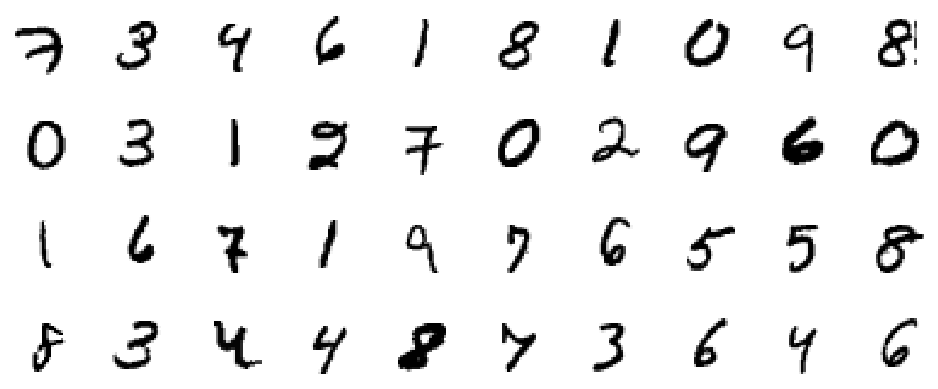

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

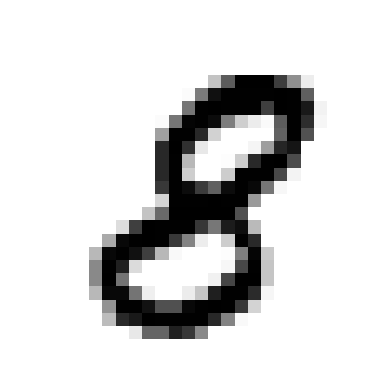

In [ ]:
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

### Create and train the model
Implement an ANN with 2 Hidden Layers, the first with 128 neurons and "relu" activation functions. The second layers instead contains 64 neurons (also relu activation function).
Don't forget the output layer :)

Also, remember that due to the 2D structure of your input data you need to first flatten them. Use the following specific layer at the very beginning inside your Sequential Model:


tf.keras.layers.Flatten(input_shape=(28, 28))

Notabene: you don't need to provide the input_dim in the first Dense layer, if you start with a Flatten layer.

In [ ]:
# TODO: Define the model architecture here
# model =  ....
from tensorflow.keras.models import Sequential


# Modell definieren
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Macht aus 28x28 ein 784-Vektor
    Dense(128, activation='relu'),        # Erste versteckte Schicht mit 128 Neuronen
    Dense(64, activation='relu'),         # Zweite versteckte Schicht mit 64 Neuronen
    Dense(10, activation='softmax')       # Output-Schicht für 10 Klassen (Ziffern)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Since my input are 2D images, I need first to "flatten" them into a 1-dimensional array. The number of input neurons will be the total number of pixels.

In [ ]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Define now which cost function to minimize in the .compile method. Take "sgd" as optimizer and track the accuracy as metric.

For classification:Pay attention to the last layer if sigmoid or softmax is explicitly indicated, then from_logits = False

Notabene: Here a Sparse Categorical Crossentropy is used, becuase we are dealing with a multi-class classification If it would be a binary classification, then the loss function (i.e. the cost function) would have been Binary Crossentropy

For a full lists of cost functions available in tf.keras (both for Regression and Classification) https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [ ]:
# TODO: Compile the model with appropriate loss, optimizer, and metrics (the choice of loss function depends on the problem you are facing)
# model.compile(...)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# TODO: Train the model using model.fit
# history = model.fit(...) # 1 epoch is a full pass over the whole training set, let's tray for 15 eopchs
history = model.fit(
    X_train, y_train,
    epochs=15,
    validation_split=0.2
)


Epoch 1/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6696 - loss: 1.1954 - val_accuracy: 0.9045 - val_loss: 0.3506
Epoch 2/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9018 - loss: 0.3502 - val_accuracy: 0.9211 - val_loss: 0.2843
Epoch 3/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9204 - loss: 0.2786 - val_accuracy: 0.9318 - val_loss: 0.2421
Epoch 4/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9328 - loss: 0.2378 - val_accuracy: 0.9375 - val_loss: 0.2167
Epoch 5/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9388 - loss: 0.2106 - val_accuracy: 0.9447 - val_loss: 0.1955
Epoch 6/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9443 - loss: 0.1930 - val_accuracy: 0.9495 - val_loss: 0.1809
Epoch 7/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9504 - loss: 0.1731 - val_accuracy: 0.9521 - val_loss: 0.1696
Epoch 8/15
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9536 - loss: 0.1568 - 

In [ ]:
# TODO: Evaluate the model on the test dataset
# model.evaluate(...)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0912 - loss: 2.3856
Test Accuracy: 0.0892


Let's now predict the digits for the first 3 images in the test set. Feel free to check more cases.
First we predict the score associated which every category and then we find out which one is the one with highest score.

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.06, 0.1 , 0.07, 0.07, 0.12, 0.27, 0.07, 0.1 , 0.07, 0.08],
       [0.06, 0.1 , 0.07, 0.07, 0.11, 0.28, 0.07, 0.09, 0.07, 0.08],
       [0.06, 0.1 , 0.07, 0.07, 0.12, 0.27, 0.07, 0.1 , 0.07, 0.08]],
      dtype=float32)

In [ ]:
y_pred=np.argmax(y_proba,axis=1)

#if you are working with binary classification, use instead the following line:
#y_pred = (y_proba > 0.5).astype("int32")

y_pred

array([5, 5, 5])

Let's now visually check

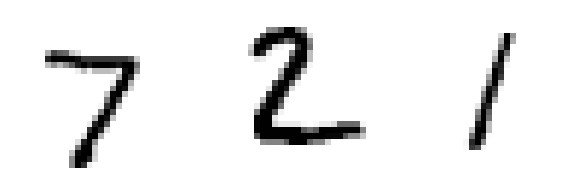

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Experimental test

The final test consist in a "physical" test.
1) Draw on a piece of paper 1 single digit between 0 and 9.
2) Take a picture with your webcam of it
3) Test if the neural network can correctly identify also your handwriting


To do that you need to preprocess first your image and put it in the right format, by using the Keras function 'load_img'
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
ATTENTION: your image need to be resized in the same size that you used for training.... And pay attention to RGB images and grayscale!

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving testbild.jpg to testbild.jpg


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
import numpy as np

# Bild laden (verwende den exakten Dateinamen, z. B. "testbild.jpg")
image = load_img("testbild.jpg", color_mode="grayscale", target_size=(28, 28))
img_array = img_to_array(image)

# Optional: invertieren, falls weiß auf schwarz trainiert wurde
 # img_array = 255 - img_array

# Normalisieren
img_array = img_array / 255.0

# In Batch umwandeln
img_array = tf.expand_dims(img_array, 0)

Now you can simply predict the class of your image, as done just before for the MNIST test images.


In [ ]:
predictions = model(img_array, training = False)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(predictions,axis=1), 100 * np.max(score))
)
print(score)

This image most likely belongs to [3] with a 21.43 percent confidence.
tf.Tensor(
[0.08648925 0.08640048 0.08783893 0.21425776 0.08640047 0.08714984
 0.08640047 0.08640047 0.0922608  0.08640153], shape=(10,), dtype=float32)


Is the result correct?

### Plot the evolution of accuracy and loss
The historical values of accuracy and loss during training and validation are stored during training in the variable "history".
You can access them through history.history.
Use this information to plot and compare the evolution of accuracy and loss for training and validation. What can you learn from this?

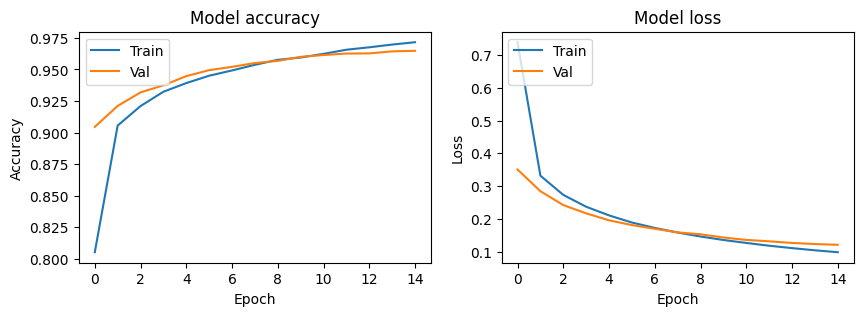

In [ ]:
plt.figure(figsize=(10,3))
# Plot training & validation accuracy values
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()